#**Machine Learning Final Project - Predicting Survival on the Titanic**
--- ---
##**Author**:  Donald Taggart


#**1.0  Project Description**
--- ---

The Wisconsin Data Science and Analytics Machine Learning Final Project is intended to simulate participation in a Kaggle machine learning competition. The chosen competition is to build the most accurate model for predicting which passengers would survive the sinking of the Titanic.  A minimum of three machine learning models must be explored.  

The project uses the dataset from the original Kaggle competition provided here: https://www.kaggle.com/

#**2.0 Data Dictionary and Variable Notes**
--- ---

The data dictionary and variable notes from the original competition are included here for reference.

Variable|Definition|Key
--------|----------|---
Survived|Survival|0 = No, 1 = Yes
Pclass|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd
Sex|Sex	
Age|Age in years	
SibSp|# of siblings / spouses aboard the Titanic	
Parch|# of parents / children aboard the Titanic	
Ticket|Ticket number	
Fare|Passenger fare	
Cabin|Cabin number	
Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton


`Pclass` is a proxy for socio-economic status (SES)

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

`Age` is fractional if less than 1. If the age is estimated, it is in the form of xx.5

`SibSp` The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

`Parch` The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.


#**3.0 Import Libraries and Upload the Data**
--- ---
Import the necessary libraries.

In [ ]:
# Import the necessary libraries

# Creating and using dataframes and plotting
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt  

# Creating and using machine learing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import CategoricalNB


When prompted, choose the `'Titanic.csv'` file to upload it into Google Colab.

In [ ]:
# Upload the 'titanic.csv' file
from google.colab import files
titanic = files.upload()


Saving Titanic.csv to Titanic.csv


#**4.0 Exploratory Data Analysis**
--- ---
Explore the data.  Look at datatypes and find null values.  Explore feature correlations.  Begin making decisions on which features to keep, exclude, encode, or engineer.

In [ ]:
# Convert the 'Titanic.csv' file into a DataFrame
titanic = pd.read_csv('Titanic.csv')

# Head the DataFrame
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**4.1 Initial Feature Correlations**
--- ---

In [ ]:
# Run correlation analysis on the training data
corr = titanic.corr()

# Visualize the correlation matrix
fig = px.imshow(corr.round(3), # the data rounded to 3 places
                title='<b>Titanic Correlation Matrix - Intitial<b>', #Change title and bold
                aspect="auto", # automatically adujusts aspect ratio
                width=900, # Set figure width
                height=600, # Set figure height
                text_auto=True, # Turn on bar totals to see numbers
                color_continuous_scale= 'earth', # Define custom color scale
                range_color=[-1,1], # Defines a range to apply color to
                )
fig.update_layout(title_x=.5, # centers the title
                  titlefont={'size': 24}, # title size
                  )

fig.show()

`Pclass` is the most negatively correlated with `Survived`, meaning that passengers in first class were more likely to survive.

`Age` is slightly negatively correlated with `Survived`, meaning that younger passengers were more likely to survive.

`SibSp` is slightly negatively correlated with `Survived`, meaning that passengers having fewer siblings and spouses onbaord were more likely to survive.

`Parch` is slightly positively correlated with `Survived`, meaning that passengers with parents and children onboard were more likely to survive.

`Fare` is the most positively correlated with `Survived`, meaning that passengers who paid more for their tickets 

##**4.2 Outcome**
--- ---

In [ ]:
# Convert 'Pclass' back to catagorical data for plotting
titanic.loc[titanic['Survived'] == 1, 'Outcome'] = 'Survivors'
titanic.loc[titanic['Survived'] == 0, 'Outcome'] = 'Victims'


# Plot 'Outcome'
fig = px.histogram(titanic, # DataFrame
                   x='Outcome', # X axis
                   title='<b>Outcome<b>', #Change title and bold
                   width=600, # Set figure width
                   height=600, # Set figure height
                   text_auto=True, # Turn on bar totals
                   color='Outcome', # Change bar color based on category
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)',
                                       }
                   )
fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers', # Changes the y-axis title
                  )
fig.show()

##**4.3 Passenger Classes**
--- ---

In [ ]:
# Convert 'Survived' back to catagorical data for plotting
titanic.loc[titanic['Pclass'] == 1, 'Passenger Class'] = 'First'
titanic.loc[titanic['Pclass'] == 2, 'Passenger Class'] = 'Second'
titanic.loc[titanic['Pclass'] == 3, 'Passenger Class'] = 'Third'


# Plot 'Passenger Class'
fig = px.histogram(titanic, # DataFrame
                   x='Passenger Class', # X axis
                   title='<b>Passenger Class<b>', #Change title and bold
                   width=600, # Set figure width
                   height=600, # Set figure height
                   text_auto=True, # Turn on bar totals                 
                   color='Outcome', # Change bar color based on category
                   category_orders={"Passenger Class": ['First','Second','Third']}, #Change x-axis order
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)',
                                       }
                   )
fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers', # Changes the y-axis title
                  )
fig.show()

First class passengers had significantly better chances of survival than either second or third class.  The majority of passengers, and victims, were in the third class.

##**4.4 Gender**
--- ---



In [ ]:
# Convert the value of 'Sex' to proper case
titanic['Sex'] = titanic['Sex'].str.title()

# Plot 'Gender'
fig = px.histogram(titanic, # DataFrame
                   x='Sex', # X axis
                   title='<b>Gender<b>', #Change title and bold
                   width=600, # Set figure width
                   height=600, # Set figure height
                   text_auto=True, # Turn on bar totals                 
                   color='Outcome', # Change bar color based on category
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)',
                                       }
                   )
fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers',# Changes the y-axis title
                  xaxis_title = 'Gender', # Changes the x-axis title
                  )
fig.show()

Female passengers had significantly better chances of survival than males.  The majority of passengers, and victims, were men.

##**4.5 Age**
--- ---



In [ ]:
# Plot 'Age'
fig = px.histogram(titanic, # DataFrame
                   x='Age', # x-axis
                   width=1200, # Set figure width
                   height=600, # Set figure height
                   title='<b>Age<b>', #Change title and bold
                   text_auto=True, # Turn on bar totals
                   color='Outcome', # Change bar color based on category
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)'},
                   marginal="box", # or violin, rug, box
                   )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers', # Changes the y-axis title
                  )
fig.show()


The age distribution for both survivors and victims is similar.


##**4.6. Siblings & Spouses** 
--- ---



In [ ]:
# Plot 'Siblings & Spouses'
fig = px.histogram(titanic, # DataFrame
                   x='SibSp', # X axis
                   title='<b>Siblings & Spouses<b>', #Change title and bold
                   width=600, # Set figure width
                   height=600, # Set figure height
                   text_auto=True, # Turn on bar totals                 
                   color='Outcome', # Change bar color based on category
                   category_orders={"SibSp": ['0','1','2','3','4','5','8']}, #Change x-axis order
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)',
                                       }
                   )
fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers',# Changes the y-axis title
                  xaxis_title = 'Siblings & Spouses', # Changes the x-axis title
                  )
fig.update_xaxes(type='category') # Force the numeric values to be categories
fig.show()



The overwhelming majority of passengers were traveling without siblings or spouses.

##**4.7 Parents & Children**
--- ---



In [ ]:
# Plot 'Parents & Children'
fig = px.histogram(titanic, # DataFrame
                   x='Parch', # X axis
                   title='<b>Parents & Children<b>', #Change title and bold
                   width=600, # Set figure width
                   height=600, # Set figure height
                   text_auto=True, # Turn on bar totals                 
                   color='Outcome', # Change bar color based on category
                   category_orders={"Parch": ['0','1','2','3','4','5','6']}, #Change x-axis order
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)',
                                       }
                   )
fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers', # Changes the y-axis title
                  xaxis_title = 'Parents & Children', # Changes the x-axis title
                  )
fig.update_xaxes(type='category') # Force the numeric values to be categories
fig.show()



The overwhelming majority of passengers were traveling without parents and children.

##**4.8 Fare**
--- ---


In [ ]:
# Plot 'Fare'
fig = px.histogram(titanic, # DataFrame
                   x='Fare', # x-axis
                   width=1200, # Set figure width
                   height=600, # Set figure height
                   title='<b>Fare<b>', #Change title and bold
                   text_auto=True, # Turn on bar totals
                   color='Outcome', # Change bar color based on category
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)'},
                   marginal="box", # or violin, rug, box
                   )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers', # Changes the y-axis title
                  )
fig.show()

The median fare of survivors is nearly 2.5 times as much as the median fare for victims.

##**4.9 Deck**
--- ---

In [ ]:
# Create the 'deck' column by removing the first character from 'Cabin' 
titanic['Deck'] = titanic['Cabin'].str[:1]

# Plot 'Deck'
fig = px.histogram(titanic, # DataFrame
                   x='Deck', # X axis
                   title='<b>Deck<b>', #Change title and bold
                   width=600, # Set figure width
                   height=600, # Set figure height
                   text_auto=True, # Turn on bar totals                 
                   color='Outcome', # Change bar color based on category
                   category_orders={"Deck": ['A','B','C','D','E','F','G','T']}, #Change x-axis order
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)',
                                       }
                   )
fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers', # Changes the y-axis title
                #   xaxis_title = 'Parents & Children', # Changes the x-axis title
                  )
fig.update_xaxes(type='category') # Force the numeric values to be categories
fig.show()

There is more inforation about where survivors quartered than where victims quartered.  

##**4.10 Embarkation Point**
--- ---



In [ ]:
# Convert 'Survived' back to catagorical data for plotting
titanic.loc[titanic['Embarked'] == 'S', 'Embarkation Point'] = 'Southampton'
titanic.loc[titanic['Embarked'] == 'C', 'Embarkation Point'] = 'Cherbourg'
titanic.loc[titanic['Embarked'] == 'Q', 'Embarkation Point'] = 'Queenstown'

# Plot 'Embarkation Point'
fig = px.histogram(titanic, # DataFrame
                   x='Embarkation Point', # X axis
                   title='<b>Embarkation Point<b>', #Change title and bold
                   width=600, # Set figure width
                   height=600, # Set figure height
                   text_auto=True, # Turn on bar totals                 
                   color='Outcome', # Change bar color based on category
                   category_orders={"Embarkation Point": ['Southampton',
                                                          'Cherbourg',
                                                          'Queenstown']}, #Change x-axis order
                   color_discrete_map={'Victims' : 'rgb(161,105,40)', # Set bar colors using 'Earth'
                                       'Survivors' : 'rgb(40,135,161)',
                                       }
                   )
fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Passengers', # Changes the y-axis title
                  )
fig.update_xaxes(type='category') # Force the numeric values to be categories
fig.show()



The overwhelming majority of passengers Embarked in Southampton.

#**5.0 Data Wrangling, Feature Engineering, and Encoding**
--- ---

`Survived` is the target variable, and is already encoded correctly.

`PassengerId`, `Name`, and `Ticket` don't add predictive value and will be dropped.

`PClass` is categorical data labeled with numbers and will need one-hot encoding.

`Sex` is categroical data that will be converted to numerical values in a new `Gender` column.

`Age` is continuous numeric data and will be standardized.  It contains null values that will be imputed to the mean after splitting the data into training and test sets.  

`SibSp`, `Parch`, and `Fare` are continuouos numeric data and will be standardized.  

`Cabin` is a series of alphanumeric data.  Consulting Encyclopedia Titanica https://www.encyclopedia-titanica.org/titanic-deckplans/ each alphanumeric sequence is a letter corresponding to the ship's deck, followed by a number indicating the cabin or cabins assigned.  Some passengers had multiple attached cabins.  The letter corresponding to the deck will be stripped and put into a new `deck` column, that will need one-hot encoding.  It contains null values that once encoded won't effect the models. 

`Embarked` is categorcal data that will be one-hot encoded.  It contains null values that once encoded won't effect the models.

`Embarked` is categorcal data that will be one-hot encoded.  It contains null values that once encoded won't effect the models.



In [ ]:
# Encode 'Sex' to 'Gender'
titanic.loc[titanic['Sex'] == 'Female', 'Gender'] = 1
titanic.loc[titanic['Sex'] == 'Male', 'Gender'] = 0

# Identify the target variable
y = titanic['Survived']

# Identify the features of interest
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin',
                  'Outcome', 'Passenger Class', 'Embarkation Point'], axis=1)

# One_hot encode categorical data
one_hot = pd.get_dummies(data=X, columns = ['Embarked','Pclass', 'Deck'])
X = one_hot

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=42)

#**6.0 Final Feature Correlations**
--- ---

In [ ]:
# Turn y_train into a dataframe
y_df = pd.DataFrame(y_train)

# Concat y_df and X_train
correlation = pd.concat([y_df, X_train], axis=1)

# Run correlation analysis on the training data
corr_train = correlation.corr()

# Visualize the correlation matrix
fig = px.imshow(corr_train.round(3), # the data rounded to 3 places
                title='<b>Titanic Correlation Matrix - Final<b>', #Change title and bold
                aspect="auto", # automatically adujusts aspect ratio
                width=1500, # Set figure width
                height=600, # Set figure height
                text_auto=True, # Turn on bar totals to see numbers
                color_continuous_scale= 'earth', # Define custom color scale
                range_color=[-1,1], # Defines a range to apply color to
                )
fig.update_layout(title_x=.5, # centers the title
                  titlefont={'size': 24}, # title size
                  )
fig.show()

The five features most corrrelated with survival tell this tale.  A female, travelling in first class, on an expensive fare, who quartered on Deck B, having embarked in Cherbourg, is the most likely person to have survived.



#**7.0 Logistic Regression Model**
--- ---

Best C: 10
The Logistic Regression Model train accuracy (cv=10) is: 82.48503 %
The Logistic Regression Model test accuracy is: 79.3722 %


,precision,recall,f1-score,support
0,0.818841,0.843284,0.830882,134.000000
1,0.752941,0.719101,0.735632,89.000000
accuracy,0.793722,0.793722,0.793722,0.793722
macro avg,0.785891,0.781192,0.783257,223.000000
weighted avg,0.792540,0.793722,0.792868,223.000000


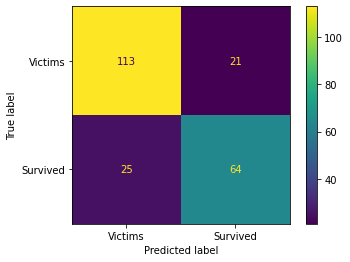

In [ ]:
# Create a Logistic Regression Model pipeline
pipe_log_reg = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                    strategy='mean')), # Impute missing data to the mean
                         ('scaler', StandardScaler()), # Standardize the data
                         ('logreg', LogisticRegression(random_state=0,
                                                       penalty='l2',
                                                       solver='liblinear'))]) # Logistic Regression model

# Create a list of C values for hyperparamter tuning
C = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 100, 1000] 

# Create a parameter space for grid search
parameters = {'logreg__C' : C}

# Create grid search object
gs_logreg = GridSearchCV(pipe_log_reg, parameters, cv=10)

# Fit the grid search
gs_logreg.fit(X_train, y_train)

# View the best parameters
print('Best C:', gs_logreg.best_estimator_.get_params()['logreg__C'])

# Calculate the accuracy for the train data
gs_logreg_train_accuracy = gs_logreg.score(X_train, y_train)

# Calculate the test data accuracy
log_reg_test_accuracy = gs_logreg.score(X_test, y_test)

# Print the train data accuracy
print('The Logistic Regression Model train accuracy (cv=10) is:',
      (round(gs_logreg_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Logistic Regression Model test accuracy is:',
      (round(log_reg_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_logreg = gs_logreg.predict(X_test)

# Create and plot a confusion matrix
cm_logreg = confusion_matrix(y_test, y_hat_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
logreg_report = classification_report(y_test, y_hat_logreg, output_dict=True)
logreg_metrics = pd.DataFrame(logreg_report).transpose()
logreg_metrics


#**8.0 K-Nearest Neighbors Model**
--- ---

Best Number of Neighbors: 19
The K Nearest Neighbors Model train accuracy (cv=10) is: 80.23952 %
The K Nearest Neighbors Model test accuracy is: 80.71749 %


,precision,recall,f1-score,support
0,0.837037,0.843284,0.840149,134.000000
1,0.761364,0.752809,0.757062,89.000000
accuracy,0.807175,0.807175,0.807175,0.807175
macro avg,0.799200,0.798046,0.798605,223.000000
weighted avg,0.806836,0.807175,0.806989,223.000000


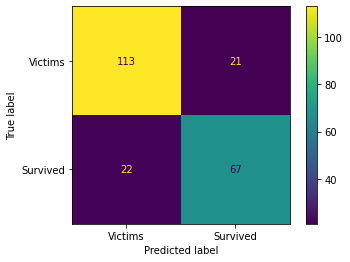

In [ ]:
# Construct a K Nearest Neighbors pipeline to impute, scale, and classify
pipe_knn = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                strategy='mean')), # Impute missing data to the mean
                     ('scaler', StandardScaler()), # Standardize the data
                     ('knn_model', KNeighborsClassifier())]) # Instantiate a KNN model

# Create a list of number of neighbors
n_features_to_select = [19] #list(range(1,30))

# Create a parameter space for grid search
parameters = {'knn_model__n_neighbors' : n_features_to_select}

# Create grid search object
gs_knn = GridSearchCV(pipe_knn, parameters, cv=10)

# Fit the grid search
gs_knn.fit(X_train, y_train)

# View the best parameters
print('Best Number of Neighbors:',
      gs_knn.best_estimator_.get_params()['knn_model__n_neighbors'])

# Calculate the accuracy for the train data
knn_train_accuracy = gs_knn.score(X_train, y_train)

# Calculate the accuracy for the test data
knn_test_accuracy = gs_knn.score(X_test, y_test)

# Print the train data accuracy
print('The K Nearest Neighbors Model train accuracy (cv=10) is:',
      (round(knn_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The K Nearest Neighbors Model test accuracy is:',
      (round(knn_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_knn = gs_knn.predict(X_test)

# Create and plot a confusion matrix
cm_knn = confusion_matrix(y_test, y_hat_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
knn_report = classification_report(y_test, y_hat_knn, output_dict=True)
knn_metrics = pd.DataFrame(knn_report).transpose()
knn_metrics


#**9.0 Support Vector Machine Model**
--- ---

Best C: 6
Best kernel: rbf
The Support Vector Model train accuracy (cv=10) is: 86.67665 %
The Support Vector Model test accuracy is: 82.06278 %


,precision,recall,f1-score,support
0,0.830986,0.880597,0.855072,134.000000
1,0.802469,0.730337,0.764706,89.000000
accuracy,0.820628,0.820628,0.820628,0.820628
macro avg,0.816728,0.805467,0.809889,223.000000
weighted avg,0.819605,0.820628,0.819007,223.000000


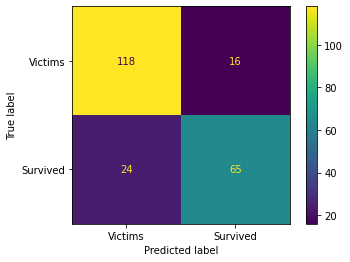

In [ ]:
# Construct a Support Vector Machine pipeline to impute, scale, and classify
pipe_SVC = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                strategy='mean')), # Impute missing data to the mean
                     ('scaler', StandardScaler()), # Standardize the data
                     ('SVC_model', SVC())]) # Instantiate a SVC model

# Create a list of C values for hyperparamter tuning
C = list(range(1,len(X_train.columns)+1))

# Create a parameter space for grid search
parameters = {'SVC_model__C' : [6], #C,
              'SVC_model__kernel' : ['rbf'], #['poly', 'linear', 'rbf']
              }

# Create grid search object
gs_SVC = GridSearchCV(pipe_SVC, parameters, cv=10)

# Fit the grid search to the training data
gs_SVC.fit(X_train, y_train)

# View the best parameters
print('Best C:', gs_SVC.best_estimator_.get_params()['SVC_model__C'])
print('Best kernel:', gs_SVC.best_estimator_.get_params()['SVC_model__kernel'])

# Calculate the accuracy for the train data
gs_SVC_train_accuracy = gs_SVC.score(X_train, y_train)

# Calculate the accuracy for the test data
gs_SVC_test_accuracy = gs_SVC.score(X_test, y_test)

# Print the train data accuracy
print('The Support Vector Model train accuracy (cv=10) is:',
      (round(gs_SVC_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Support Vector Model test accuracy is:',
      (round(gs_SVC_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_SVC = gs_SVC.predict(X_test)

# Create and plot a confusion matrix
cm_SVC = confusion_matrix(y_test, y_hat_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVC,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
SVC_report = classification_report(y_test, y_hat_SVC, output_dict=True)
SVC_metrics = pd.DataFrame(SVC_report).transpose()
SVC_metrics


#**10.0 Decision Tree Model**

Best Criterion: entropy
Best Depth: 4
Best Number of Features: 17
The Decision Tree Model train accuracy (cv=10) is: 84.13174 %
The Decision Tree Model test accuracy is: 81.16592 %


,precision,recall,f1-score,support
0,0.815068,0.888060,0.850000,134.000000
1,0.805195,0.696629,0.746988,89.000000
accuracy,0.811659,0.811659,0.811659,0.811659
macro avg,0.810132,0.792344,0.798494,223.000000
weighted avg,0.811128,0.811659,0.808888,223.000000


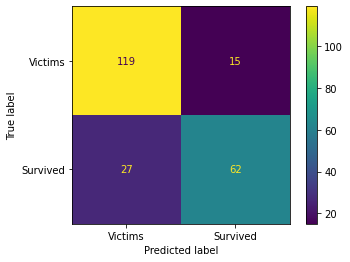

In [ ]:
# Construct a Decision Tree pipeline to impute, scale, and classify
pipe_tree = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                 strategy='mean')), # Impute missing data to the mean
                      ('scaler', StandardScaler()), # Standardize the data
                      ('tree', DecisionTreeClassifier(random_state=42))]) # Instantiate a tree model

# Create a list of features to select
n_features_to_select = list(range(1,len(X_train.columns)+1))

# Create a parameter space for grid search
parameters = {
              'tree__max_depth' : [4], #n_features_to_select,
              'tree__max_features' : [17], #n_features_to_select,
              'tree__criterion' : ['entropy'] # ['gini', 'entropy']
              }

# Create grid search object
gs_tree = GridSearchCV(pipe_tree, parameters, cv=10)

# Fit the model to the training data
gs_tree.fit(X_train, y_train)

# View the best parameters
print('Best Criterion:',
      gs_tree.best_estimator_.get_params()['tree__criterion'])
print('Best Depth:',
      gs_tree.best_estimator_.get_params()['tree__max_depth'])
print('Best Number of Features:',
      gs_tree.best_estimator_.get_params()['tree__max_features'])

# Calculate the accuracy for the train data
tree_train_accuracy = gs_tree.score(X_train, y_train)

# Calculate the accuracy for the test data
tree_test_accuracy = gs_tree.score(X_test, y_test)

# Print the train data accuracy
print('The Decision Tree Model train accuracy (cv=10) is:',
      (round(tree_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Decision Tree Model test accuracy is:',
      (round(tree_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_tree = gs_tree.predict(X_test)

# Create and plot a confusion matrix
cm_tree = confusion_matrix(y_test, y_hat_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
tree_report = classification_report(y_test, y_hat_tree, output_dict=True)
tree_metrics = pd.DataFrame(tree_report).transpose()
tree_metrics


#**11.0 Random Forest Model**

Best Criterion: entropy
Best Depth: 6
Best Number of Features: 5
The Random Forest Model train accuracy (cv=10) is: 84.13174 %
The Random Forest Model test accuracy is: 81.16592 %


,precision,recall,f1-score,support
0,0.815068,0.888060,0.850000,134.000000
1,0.805195,0.696629,0.746988,89.000000
accuracy,0.811659,0.811659,0.811659,0.811659
macro avg,0.810132,0.792344,0.798494,223.000000
weighted avg,0.811128,0.811659,0.808888,223.000000


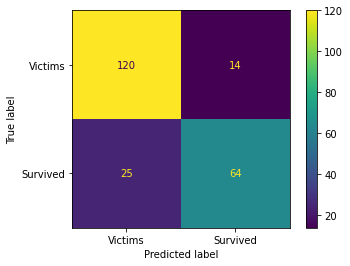

In [ ]:
# Construct a Random Forest pipeline to impute, scale, and classify
pipe_RF_tree = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                 strategy='mean')), # Impute missing data to the mean
                         ('scaler', StandardScaler()), # Standardize the data
                         ('RF_tree', RandomForestClassifier(random_state=42))]) # Instantiate a tree model

# Create a list of features to select
n_features_to_select = list(range(1,10))

# Create a list of max depth to select
max_depth = list(range(1,10))

# Create a parameter space for grid search
parameters = {
              'RF_tree__max_depth' : [6], # max_depth,
              'RF_tree__max_features' : [5], # n_features_to_select,
              'RF_tree__criterion' : ['entropy'] # ['gini', 'entropy']
              }

# Create grid search object
gs_RF_tree = GridSearchCV(pipe_RF_tree, parameters, cv=10)

# Fit the model to the training data
gs_RF_tree.fit(X_train, y_train)

# View the best parameters
print('Best Criterion:',
      gs_RF_tree.best_estimator_.get_params()['RF_tree__criterion'])
print('Best Depth:', 
      gs_RF_tree.best_estimator_.get_params()['RF_tree__max_depth'])
print('Best Number of Features:',
      gs_RF_tree.best_estimator_.get_params()['RF_tree__max_features'])

# Calculate the accuracy for the train data
RF_train_accuracy = gs_RF_tree.score(X_train, y_train)

# Calculate the accuracy for the test data
RF_test_accuracy = gs_RF_tree.score(X_test, y_test)

# Print the train data accuracy
print('The Random Forest Model train accuracy (cv=10) is:',
      (round(tree_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Random Forest Model test accuracy is:',
      (round(tree_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_RF_tree = gs_RF_tree.predict(X_test)

# Create and plot a confusion matrix
cm_tree = confusion_matrix(y_test, y_hat_RF_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
RF_tree_report = classification_report(y_test, y_hat_RF_tree, output_dict=True)
RF_tree_metrics = pd.DataFrame(tree_report).transpose()
RF_tree_metrics


#**12.0 AdaBoost Model**

Best Number of Estimators: 70
Best Learning Rate: 0.4
The AdaBoost Model train accuracy (cv=10) is: 83.38323 %
The AdaBoost Model test accuracy is: 81.16592 %


,precision,recall,f1-score,support
0,0.843284,0.843284,0.843284,134.000000
1,0.764045,0.764045,0.764045,89.000000
accuracy,0.811659,0.811659,0.811659,0.811659
macro avg,0.803664,0.803664,0.803664,223.000000
weighted avg,0.811659,0.811659,0.811659,223.000000


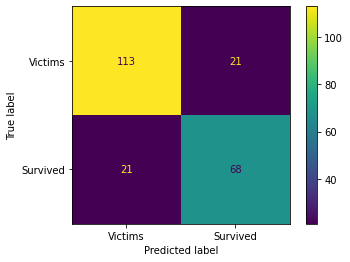

In [ ]:
# Construct a AdaBoost pipeline to impute, scale, and classify
pipe_Ada = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                strategy='mean')), # Impute missing data to the mean
                      ('scaler', StandardScaler()), # Standardize the data
                      ('Ada', AdaBoostClassifier(random_state=42))]) # Instantiate a AdaBoost model

# Create a list of estimators
n_features_to_select = [40, 50, 70, 80, 90, 100]

# Create a list of learning rates for hyperparamter tuning
learning_rate = [ 0.1, 0.2, 0.3, 0.4, 0.5]

# Create a parameter space for grid search
parameters = {
              'Ada__n_estimators' : [70], # n_features_to_select,
              'Ada__learning_rate' : [.4], # learning_rate,
              }

# Create grid search object
gs_Ada = GridSearchCV(pipe_Ada, parameters, cv=10)

# Fit the model to the training data
gs_Ada.fit(X_train, y_train)

# View the best parameters
print('Best Number of Estimators:',
      gs_Ada.best_estimator_.get_params()['Ada__n_estimators'])
print('Best Learning Rate:',
      gs_Ada.best_estimator_.get_params()['Ada__learning_rate'])

# Calculate the accuracy for the train data
Ada_train_accuracy = gs_Ada.score(X_train, y_train)

# Calculate the accuracy for the test data
Ada_test_accuracy = gs_Ada.score(X_test, y_test)

# Print the train data accuracy
print('The AdaBoost Model train accuracy (cv=10) is:',
      (round(Ada_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The AdaBoost Model test accuracy is:',
      (round(Ada_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_Ada = gs_Ada.predict(X_test)

# Create and plot a confusion matrix
cm_Ada = confusion_matrix(y_test, y_hat_Ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_Ada,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
Ada_report = classification_report(y_test, y_hat_Ada, output_dict=True)
Ada_metrics = pd.DataFrame(Ada_report).transpose()
Ada_metrics


#**13.0 Gradient Boost Model**

Best Number of Estimators: 10
Best Learning Rate: 0.4
The GradientBoosting Model train accuracy (cv=10) is: 83.83234 %
The GradientBoosting Model test accuracy is: 81.61435 %


,precision,recall,f1-score,support
0,0.816327,0.895522,0.854093,134.000000
1,0.815789,0.696629,0.751515,89.000000
accuracy,0.816143,0.816143,0.816143,0.816143
macro avg,0.816058,0.796076,0.802804,223.000000
weighted avg,0.816112,0.816143,0.813154,223.000000


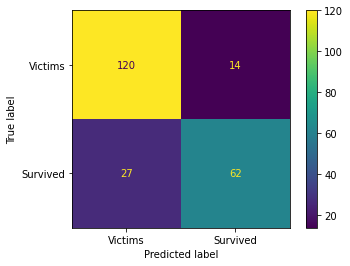

In [ ]:
# Construct a GradientBoosting pipeline to impute, scale, and classify
pipe_GB = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                 strategy='mean')), # Impute missing data to the mean
                      ('scaler', StandardScaler()), # Standardize the data
                      ('GB', GradientBoostingClassifier(random_state=42))]) # Instantiate a GradientBoosting model

# Create a list of estimators
n_esimators_to_select = [1, 3, 5, 10, 20, 30, 40, 50]

# Create a list of maximum depths
# max_depth = [1, 2, 3, 4, 5]

# Create a list of learning rates for hyperparamter tuning
learning_rate = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Create a parameter space for grid search
parameters = {
              'GB__n_estimators' : [10], #n_esimators_to_select,
              'GB__max_depth' : [2],
              'GB__learning_rate' : [.4], #learning_rate,
              }

# Create grid search object
gs_GB = GridSearchCV(pipe_GB, parameters, cv=10)

# Fit the model to the training data
gs_GB.fit(X_train, y_train)

# View the best parameters
print('Best Number of Estimators:',
      gs_GB.best_estimator_.get_params()['GB__n_estimators'])
# print('Best Maximum Depth:',
    #   gs_GB.best_estimator_.get_params()['GB__max_depth'])
print('Best Learning Rate:',
      gs_GB.best_estimator_.get_params()['GB__learning_rate'])

# Calculate the accuracy for the train data
GB_train_accuracy = gs_GB.score(X_train, y_train)

# Calculate the accuracy for the test data
GB_test_accuracy = gs_GB.score(X_test, y_test)

# Print the train data accuracy
print('The GradientBoosting Model train accuracy (cv=10) is:',
      (round(GB_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The GradientBoosting Model test accuracy is:',
      (round(GB_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_GB = gs_GB.predict(X_test)

# Create and plot a confusion matrix
cm_GB = confusion_matrix(y_test, y_hat_GB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
GB_report = classification_report(y_test, y_hat_GB, output_dict=True)
GB_metrics = pd.DataFrame(GB_report).transpose()
GB_metrics


#**14.0 Naive Bayes Classification Model**
--- ---

The Naive Bayes Classifier Model train accuracy (cv=10) is: 73.50746 %
The Naive Bayes Classifier Model test accuracy is: 72.19731 %


,precision,recall,f1-score,support
0,0.810345,0.701493,0.752000,134.000000
1,0.626168,0.752809,0.683673,89.000000
accuracy,0.721973,0.721973,0.721973,0.721973
macro avg,0.718257,0.727151,0.717837,223.000000
weighted avg,0.736839,0.721973,0.724731,223.000000


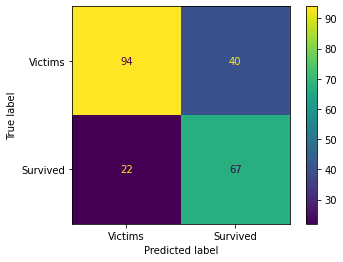

In [ ]:
# Tranform the data for use in a Naive Bayes Classifier
X_train_ = X_train.copy()
X_test_ = X_test.copy()

# Categorize 'Fare' for one-hot encoding later: train
X_train_.loc[X_train_['Fare'] <= 10.5, 'Fare_NB'] = 3 # Third Class
X_train_.loc[(X_train_['Fare'] > 10.5) & (X_train_['Fare'] <= 25.5), 'Fare_NB'] = 2 # Second Class
X_train_.loc[X_train_['Fare'] > 25.5, 'Fare_NB'] = 1 # First Class

# Categorize 'Fare' for one-hot encoding later: test
X_test_.loc[X_test_['Fare'] <= 10.5, 'Fare_NB'] = 3 # Third Class
X_test_.loc[(X_test_['Fare'] > 10.5) & (X_test_['Fare'] <= 25.5), 'Fare_NB'] = 2 # Second Class
X_test_.loc[X_test_['Fare'] > 25.5, 'Fare_NB'] = 1 # First Class

# Categorize 'Age' for one-hot encoding later, train
X_train_.loc[X_train_['Age'] <= 14, 'Age_NB'] = 3 # Children
X_train_.loc[(X_train_['Age'] > 14) & (X_train_['Age'] <= 55), 'Age_NB'] = 2 # Adults
X_train_.loc[X_train_['Age'] > 55, 'Age_NB'] = 1 # Seniors

# Categorize 'Age' for one-hot encoding later, test
X_test_.loc[X_test_['Age'] <= 14, 'Age_NB'] = 3 # Children
X_test_.loc[(X_test_['Age'] > 14) & (X_test_['Age'] <= 55), 'Age_NB'] = 2 # Adults
X_test_.loc[X_test_['Age'] > 55, 'Age_NB'] = 1 # Seniors

# Categorize 'SibSp' and 'Parch to 'Companion', train
X_train_.loc[(X_train_['SibSp'] == 0) & X_train_['Parch'] == 0, 'Companion'] = 0 # Traveling alone
X_train_.loc[(X_train_['SibSp'] > 0) | X_train_['Parch'] > 0, 'Companion'] = 1 # Traveling with someone

# Categorize 'SibSp' and 'Parch to 'Companion', test
X_test_.loc[(X_test_['SibSp'] == 0) & X_test_['Parch'] == 0, 'Companion'] = 0 # Traveling alone
X_test_.loc[(X_test_['SibSp'] > 0) | X_test_['Parch'] > 0, 'Companion'] = 1 # Traveling with someone

# One_hot encode categorical data, train
one_hot = pd.get_dummies(data=X_train_, columns = ['Fare_NB', 'Age_NB'])
X_train_ = one_hot

# One_hot encode categorical data, test
one_hot = pd.get_dummies(data=X_test_, columns = ['Fare_NB', 'Age_NB'])
X_test_ = one_hot

# Create the new training and test sets
X_train_ = X_train_.drop(['Age', 'Fare', 'Parch', 'SibSp', 'Deck_G', 'Deck_T'], axis=1)
X_test_ = X_test_.drop(['Age', 'Fare', 'Parch', 'SibSp', 'Deck_G', 'Deck_T'], axis=1) 

# Construct a Naive Bayes Classifier Model
model_NB =CategoricalNB() # Instantiate a NB model

# Fit the model to the training data
model_NB.fit(X_train_, y_train)

# Implement 10-fold cross validation on the training data
NB_cross_val_scores = cross_val_score(model_NB, X_train_, y_train, cv=10)

# Calculate the accuracy for the test data
NB_test_accuracy = model_NB.score(X_test_, y_test)

# Print the train data accuracy
print('The Naive Bayes Classifier Model train accuracy (cv=10) is:',
      (round(NB_cross_val_scores.mean()*100,5)), '%')

# Print the test data accuracy
print('The Naive Bayes Classifier Model test accuracy is:',
      (round(NB_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_NB = model_NB.predict(X_test_)

# Create and plot a confusion matrix
cm_NB = confusion_matrix(y_test, y_hat_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_NB,
                              display_labels=['Victims', 'Survived'])
disp.plot()

# Compute and print a classification report
NB_report = classification_report(y_test, y_hat_NB, output_dict=True)
NB_metrics = pd.DataFrame(NB_report).transpose()
NB_metrics


#**15.0 Results**

In [ ]:
# Present Results
classifier_df = pd.DataFrame(['Logistic Regression', 'K_Nearest Neighbors',
                              'Support Vector Machine', 'Decision Tree', 'Random Forest',
                              'AdaBoost', 'GradientBoost', 'Naive Bayes'])

train_results_df = pd.DataFrame([gs_logreg_train_accuracy, knn_train_accuracy,
                              gs_SVC_train_accuracy, tree_train_accuracy,
                              RF_train_accuracy, Ada_train_accuracy,
                              GB_train_accuracy, NB_cross_val_scores.mean()])

test_results_df = pd.DataFrame([log_reg_test_accuracy, knn_test_accuracy,
                             gs_SVC_test_accuracy, tree_test_accuracy,
                             RF_test_accuracy, Ada_test_accuracy,
                             GB_test_accuracy, NB_test_accuracy])

# Create DataFrame containin results
results_df = pd.concat([classifier_df, train_results_df, test_results_df], axis=1)
results_df.columns =['Model', 'Training Accuracy', 'Test Accuracy']
results_df['Training Accuracy'] = results_df['Training Accuracy']*100
results_df['Test Accuracy'] = results_df['Test Accuracy']*100

# Print the results DataFrame
results_df

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,82.485030,79.372197
1,K_Nearest Neighbors,80.239521,80.717489
2,Support Vector Machine,86.676647,82.062780
3,Decision Tree,84.131737,81.165919
4,Random Forest,86.976048,82.511211
5,AdaBoost,83.383234,81.165919
6,GradientBoost,83.832335,81.614350
7,Naive Bayes,73.507463,72.197309


In [ ]:
# Display the Training Results
fig = px.bar(results_df, # DataFrame
             x='Training Accuracy', # X axis
             y='Model', # y axis
             orientation='h', # horizontal orientation
             title='<b>Training Data % Accuracy<b>', # Bold Title
             width=1000, # Set figure width
             height=600, # Set figure height
             text_auto=True, # Turn on bar totals
             color='Model', # column to color by
             color_discrete_sequence=px.colors.qualitative.G10, # Color Pallete
             )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  barmode='stack', # Stack the bars
                  yaxis={'categoryorder' : 'total ascending'}, # descending order                 
                  )
fig.show()


In [ ]:
# Display the Test Results
fig = px.bar(results_df, # DataFrame
             x='Test Accuracy', # X axis
             y='Model', # y axis
             orientation='h', # horizontal orientation
             title='<b>Test Data % Accuracy<b>', # Bold Title
             width=1000, # Set figure width
             height=600, # Set figure height
             text_auto=True, # Turn on bar totals
             color='Model', # column to color by
             color_discrete_sequence=px.colors.qualitative.G10, # Color Pallete
             )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  barmode='stack', # Stack the bars
                  yaxis={'categoryorder' : 'total ascending'}, # descending order
                  )
fig.show()


Random Forest is the most accurate.